# Dimensionality Reduction Exercise

In this exercise, you will be asked to build several Machine Learning models, while understanding the value of PCA dimensionality reduction. Make sure your code is readable, functional, documented and that you give elaborate explanations and some plots to go with your code.

## Load the MNIST dataset attached to this exercise (it is already divided to train and test sets, load both)

In [1]:
# your code here
import pandas as pd
df_train = pd.read_csv('mnist_train.csv')
df_test = pd.read_csv('mnist_test.csv')

In [2]:
df_train.shape,df_test.shape

((60000, 785), (10000, 785))

## 1. Build a classifier of your choice on the given data (your features are the pixels), and evaluate it. Elaborate on the performance of your model.

In [3]:
X_train = df_train.drop(columns = ['label'])
y_train = df_train.label
X_test = df_test.drop(columns = ['label'])
y_test = df_test.label

In [4]:
# your code here
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_rf = dt.predict(X_test)
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       980
           1       0.96      0.96      0.96      1135
           2       0.87      0.86      0.86      1032
           3       0.82      0.86      0.84      1010
           4       0.88      0.87      0.88       982
           5       0.84      0.84      0.84       892
           6       0.90      0.88      0.89       958
           7       0.92      0.90      0.91      1028
           8       0.81      0.81      0.81       974
           9       0.85      0.85      0.85      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



Based on the metrics we get, the model performance is great with an accuracy of 0.88 and precison and recall for each value of the target variable > 0.8

## 2. Perform a PCA dimensionality reduction on the data, and re-train the same model on the new top k PCA-ed features. Evaluate the new model and elaborate on the performance of your model, and compare it to the performance of model without PCA.
## The value of k is for you to choose, but it must be pretty small.  Try some different numbers, and explain why you chose that number.

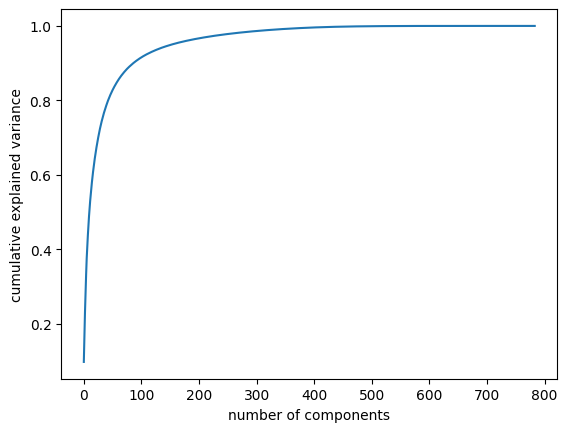

In [5]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
pca.fit(X_train,y_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

We see that the first 100 components contain around 90% of the variance of the data. We choose k = 150

In [6]:
# your code here
pca2 = PCA(n_components = 150)
pca2.fit(X_train,y_train)
X_train_transformed = pca.transform(X_train)
X_test_transformed = pca.transform(X_test)

dt2 = DecisionTreeClassifier()
dt2.fit(X_train_transformed,y_train)
y_pred_dt_pca = dt2.predict(X_test_transformed)

print(classification_report(y_test,y_pred_dt_pca))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       980
           1       0.94      0.95      0.95      1135
           2       0.83      0.80      0.82      1032
           3       0.78      0.80      0.79      1010
           4       0.81      0.79      0.80       982
           5       0.74      0.73      0.74       892
           6       0.87      0.86      0.87       958
           7       0.83      0.84      0.84      1028
           8       0.73      0.72      0.73       974
           9       0.76      0.77      0.76      1009

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



We get an accuracy of 0.83 and precision and recall between 0.74 and 0.96 depending on classes.
Result are slightly worse than the model without PCA.

## 3. Compare the model metrics that you got from question 2, to a model with random subset of regular features:
- Use the same number of features k as you used in question 2.
- The actual features used is full regular pixel features without PCA.  
- But instead of using all such 784 features, use a random subset of size k of features from question 2.

Elaborate on your findings.

In [7]:
# your code here
import numpy as np
import random

random_indexes = np.sort(random.sample(range(784),150))
X_train_random = X_train.loc[:,X_train.columns[random_indexes]]
X_test_random = X_test.loc[:,X_test.columns[random_indexes]]
dt3 = DecisionTreeClassifier()
dt3.fit(X_train_random,y_train)
y_pred_random_dt = dt3.predict(X_test_random)
print(classification_report(y_test,y_pred_random_dt))


              precision    recall  f1-score   support

           0       0.91      0.92      0.91       980
           1       0.94      0.96      0.95      1135
           2       0.84      0.83      0.84      1032
           3       0.82      0.81      0.81      1010
           4       0.85      0.85      0.85       982
           5       0.77      0.79      0.78       892
           6       0.88      0.84      0.86       958
           7       0.91      0.87      0.89      1028
           8       0.75      0.76      0.76       974
           9       0.80      0.82      0.81      1009

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



We see that the result we get are quite similar to the result we get on the PCA model. We get the same accuracy but precisions and recall slighly worse than the model with PCA.
